### Tuning Observation

#### Load Dataset

In [23]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [24]:
# Load Dataset
path = './source/l1.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,0.163194,0.162511,0.160432,0.156504,0.152832,0.153384,0.160395,0.175573,0.162624,0.156
1,2023-09-08 02:39:25,0.154760,0.152053,0.144265,0.153077,0.151156,0.146197,0.153188,0.145541,0.154248,0.154
2,2023-09-08 02:39:30,0.148360,0.141814,0.127706,0.143333,0.146130,0.132894,0.148120,0.126703,0.148889,0.128
3,2023-09-08 02:39:35,0.143503,0.129723,0.112419,0.140257,0.148420,0.128580,0.147683,0.137833,0.141520,0.154
4,2023-09-08 02:39:40,0.139819,0.114421,0.099374,0.137189,0.150421,0.130127,0.148424,0.136489,0.128825,0.162


#### Find Pearson Correlation

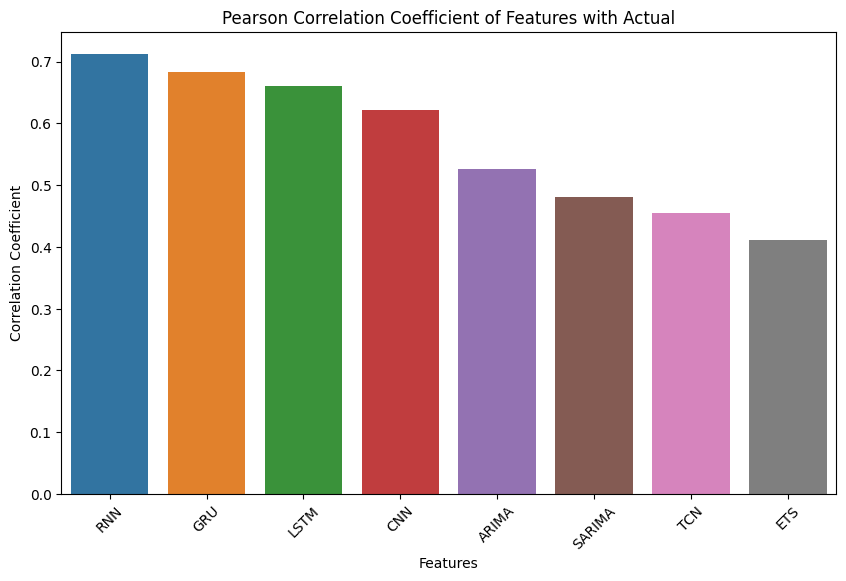

,Correlation with Actual
RNN,0.712328
GRU,0.683405
LSTM,0.659851
CNN,0.621842
ARIMA,0.525600
SARIMA,0.481091
TCN,0.455122
ETS,0.410765


In [25]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
correlation_target = 'Actual'
prediction_target = 'Actual'
rmse_target = 'Actual'
correlations = {feature: pearsonr(data[feature], data[correlation_target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=[f'Correlation with {correlation_target}'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted[f'Correlation with {correlation_target}'])
plt.title(f'Pearson Correlation Coefficient of Features with {correlation_target}')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [26]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [prediction_target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[prediction_target])
compare_rmse_column = data[rmse_target].dropna().iloc[750:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:750]
test_data = cleaned_data.iloc[750:]

#### Linear Regression

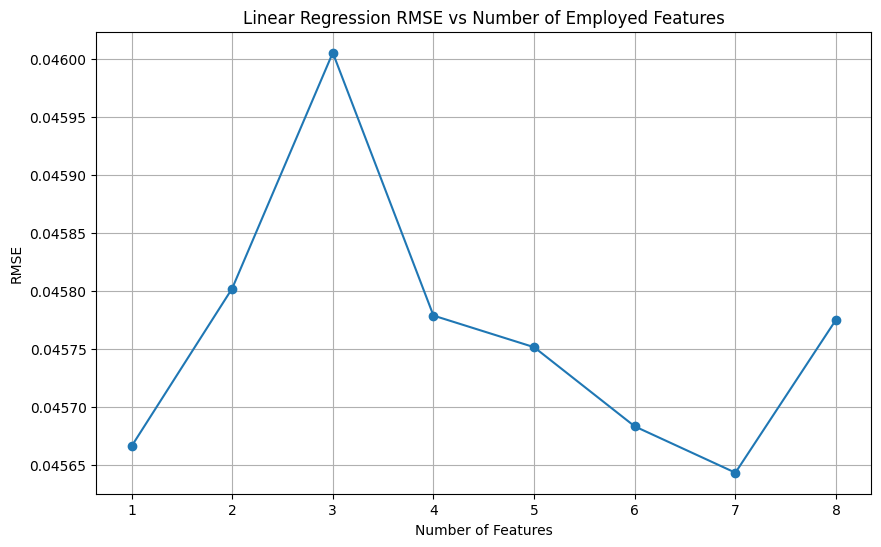

[0.045666268721003274,
 0.045802243083941596,
 0.0460053510101728,
 0.04577892892445769,
 0.04575168052441466,
 0.04568346480604458,
 0.045643548183000315,
 0.0457753746901462]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('Linear Regression RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

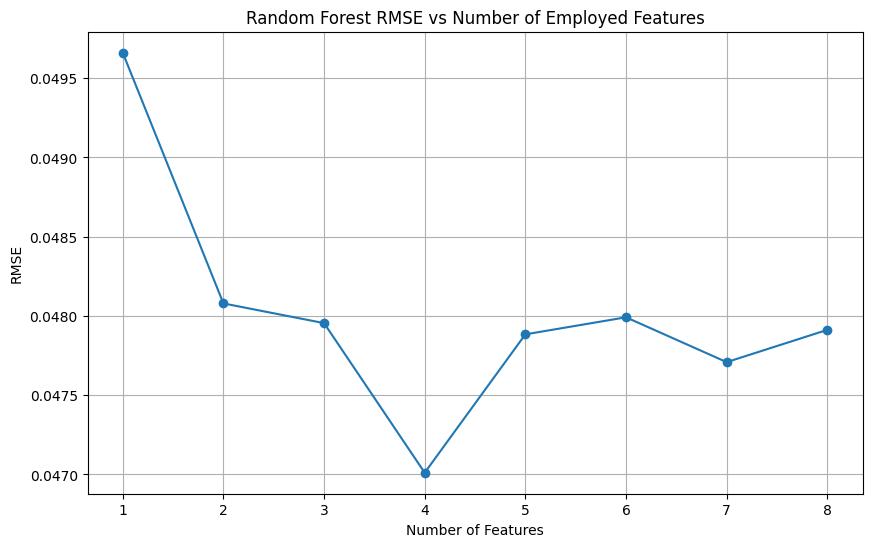

[0.04966028416569227,
 0.04807891633339362,
 0.04795465124007532,
 0.0470110013390481,
 0.047883855181258816,
 0.04799140939024633,
 0.04770860665733124,
 0.047912050405351576]

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

16/16 [==============================] - 0s 2ms/step


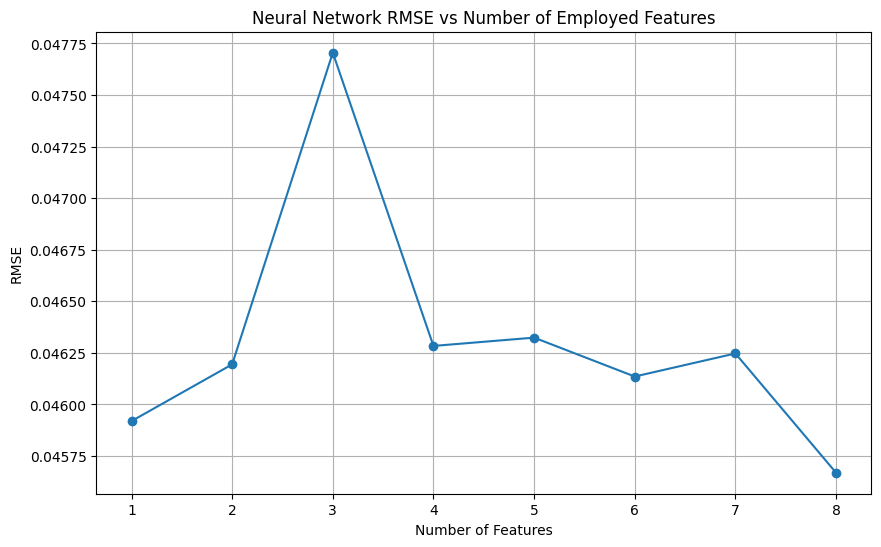

[0.04591903414570667,
 0.04619401708825558,
 0.04770512072513388,
 0.04628346148854625,
 0.04632370431104602,
 0.046135102945735175,
 0.046247000389056825,
 0.04566871143131231]

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(50, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(50, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values